In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf

In [2]:
df = pd.read_parquet(r"D:\Git\darts-pipeline\data\dataset\rossmann.parquet")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8307 entries, 19 to 8477
Data columns (total 99 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8307 non-null   datetime64[ns]
 1   Store                      8307 non-null   int64         
 2   DayOfWeek                  8307 non-null   int64         
 3   Sales                      8307 non-null   int64         
 4   Customers                  8307 non-null   int64         
 5   Open                       8307 non-null   int64         
 6   Promo                      8307 non-null   int64         
 7   SchoolHoliday              8307 non-null   int64         
 8   month                      8307 non-null   int64         
 9   week                       8307 non-null   int64         
 10  day_of_week                8307 non-null   int64         
 11  day_of_month               8307 non-null   int64         
 12  day_o

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

df.set_index("Date", inplace=True)

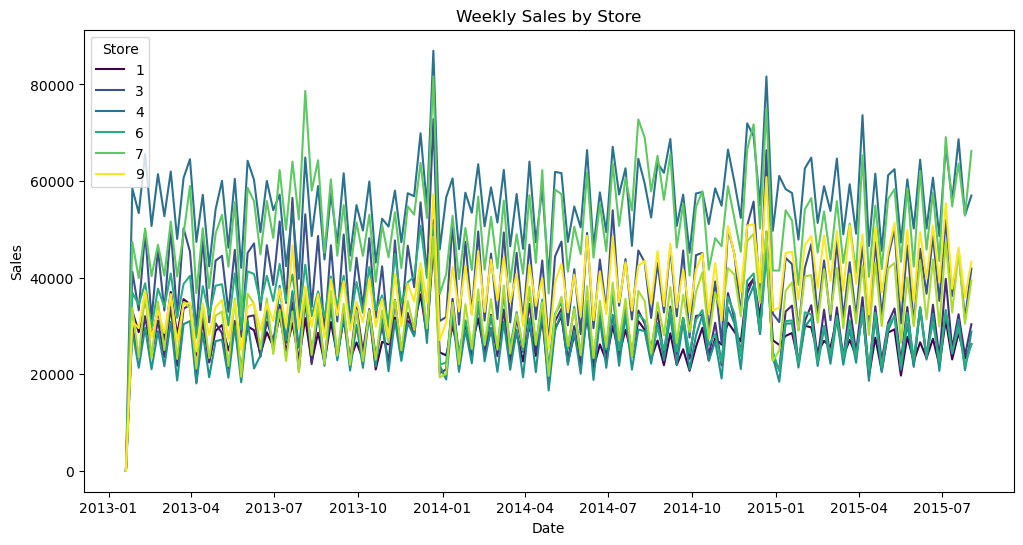

In [5]:
resampled = df.copy().groupby("Store")["Sales"].resample("W").sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=resampled, x="Date", y="Sales", hue="Store", palette="viridis")

plt.title("Weekly Sales by Store")
plt.show()

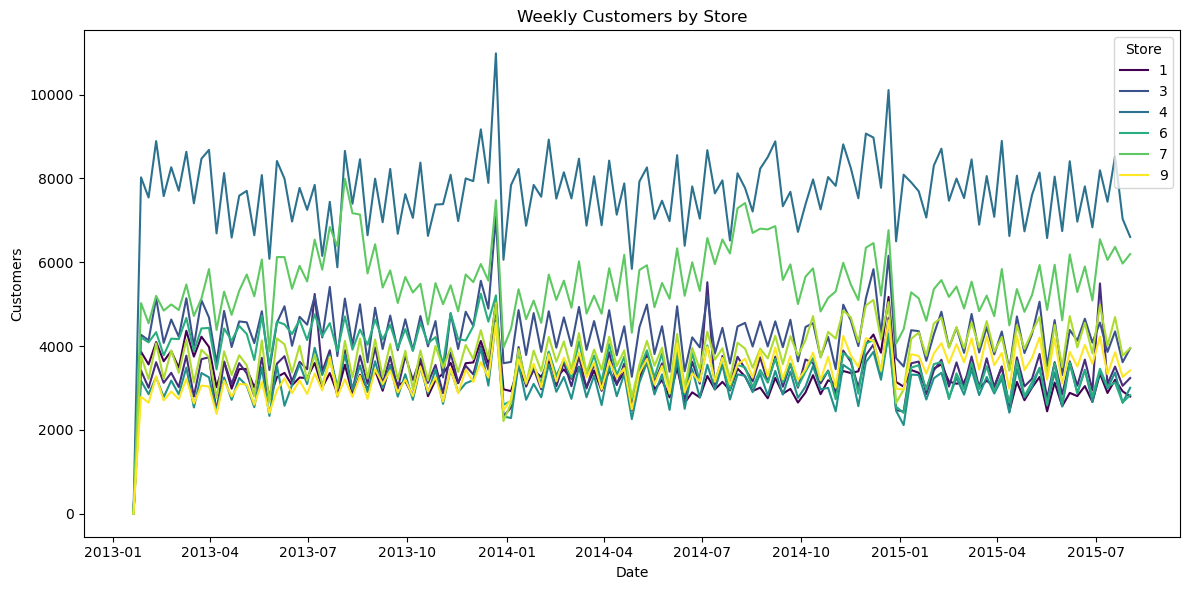

In [6]:
resampled = df.copy().groupby("Store")["Customers"].resample("W").sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=resampled, x="Date", y="Customers", hue="Store", palette="viridis")

plt.title("Weekly Customers by Store")
plt.tight_layout()
plt.show()

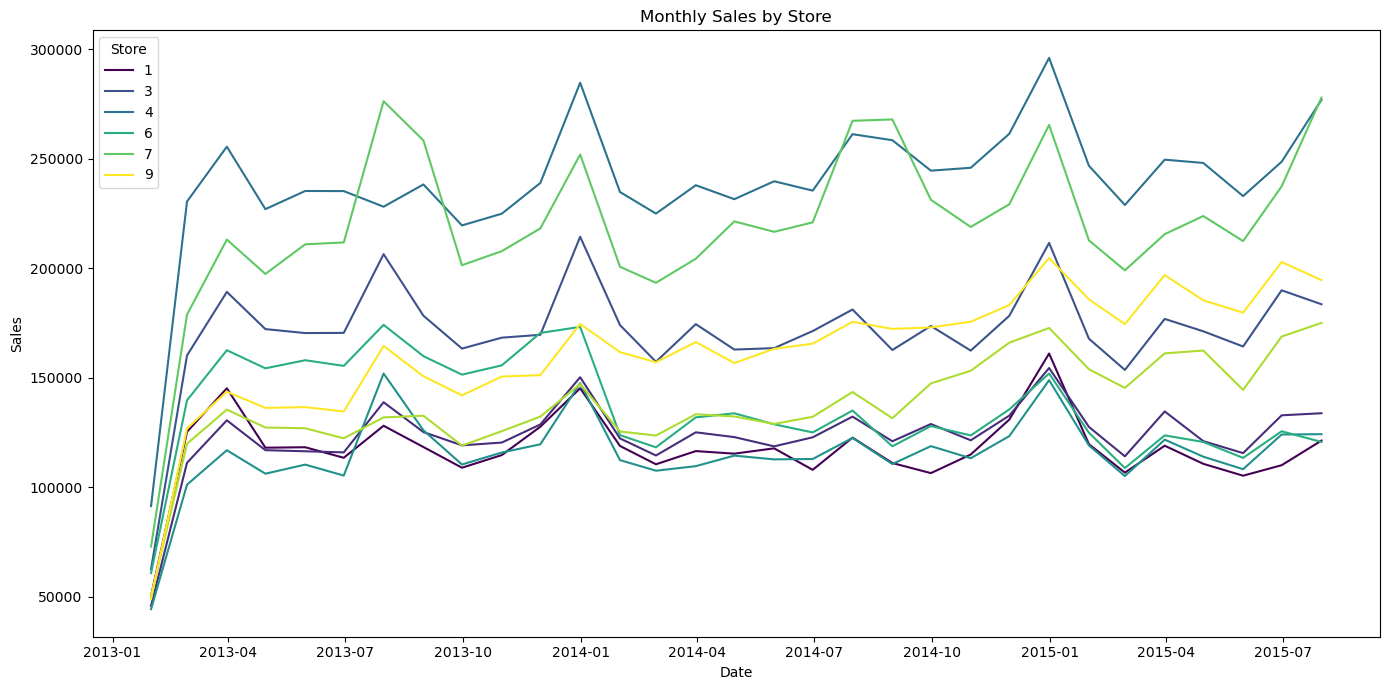

In [7]:
resampled = df.copy().groupby("Store")["Sales"].resample("M").sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=resampled, x="Date", y="Sales", hue="Store", palette="viridis")

plt.title("Monthly Sales by Store")
plt.tight_layout()
plt.show()

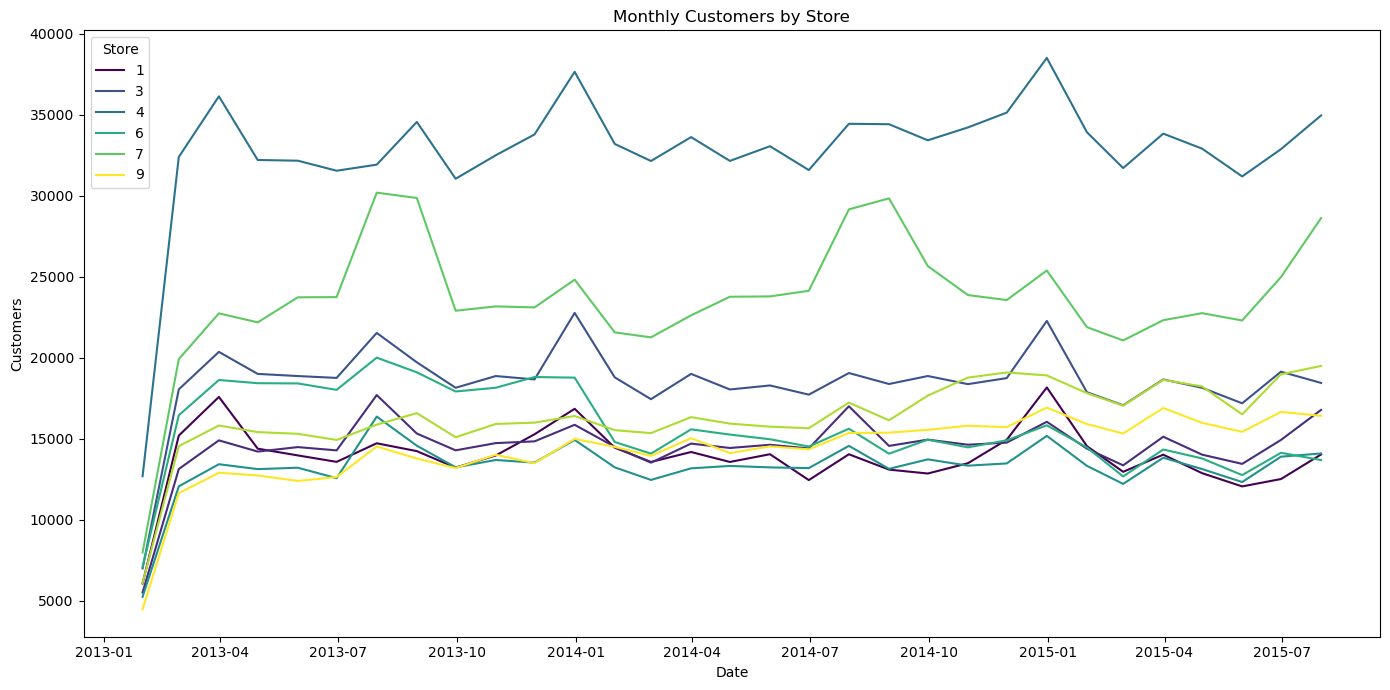

In [8]:
resampled = df.copy().groupby("Store")["Customers"].resample("M").sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=resampled, x="Date", y="Customers", hue="Store", palette="viridis")

plt.title("Monthly Customers by Store")
plt.tight_layout()
plt.show()

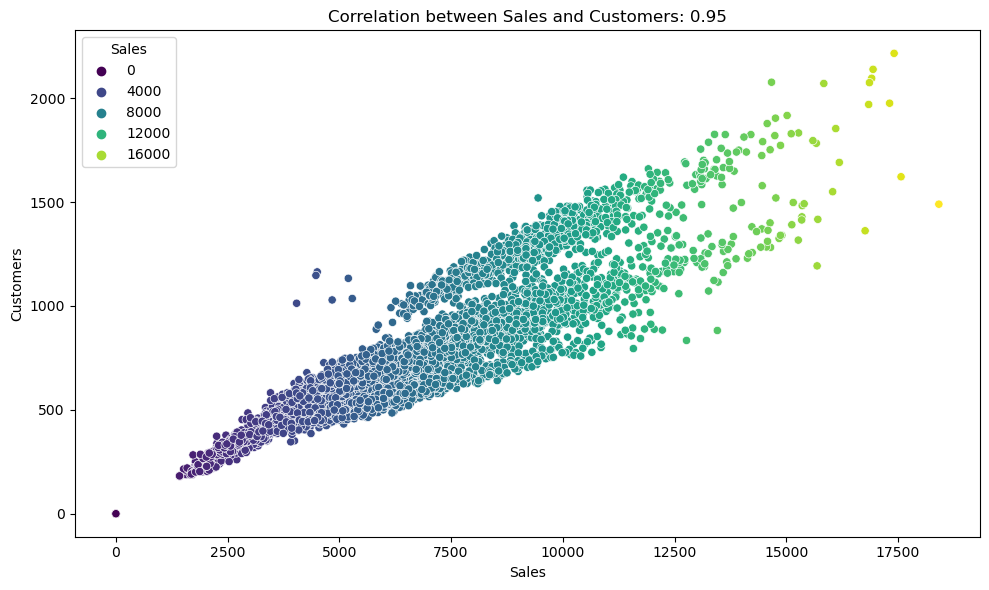

In [9]:
correlation = df["Sales"].corr(df["Customers"])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x="Sales", y="Customers", hue="Sales", palette="viridis", edgecolor="w"
)
plt.title(f"Correlation between Sales and Customers: {correlation:.2f}")
plt.tight_layout()
plt.show()

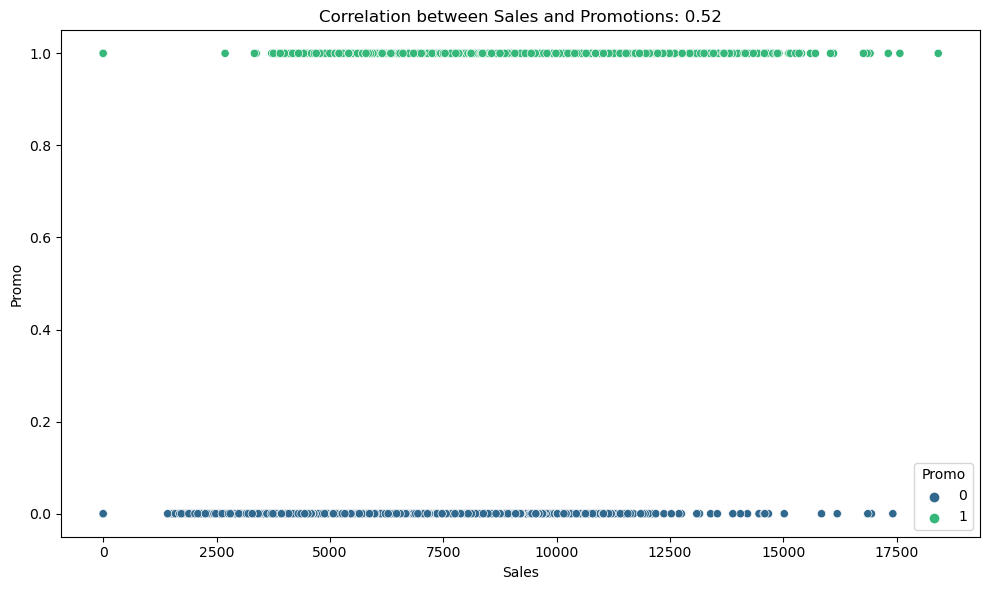

In [10]:
correlation = df["Sales"].corr(df["Promo"])

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x="Sales", y="Promo", hue="Promo", palette="viridis", edgecolor="w"
)
plt.title(f"Correlation between Sales and Promotions: {correlation:.2f}")
plt.tight_layout()
plt.show()

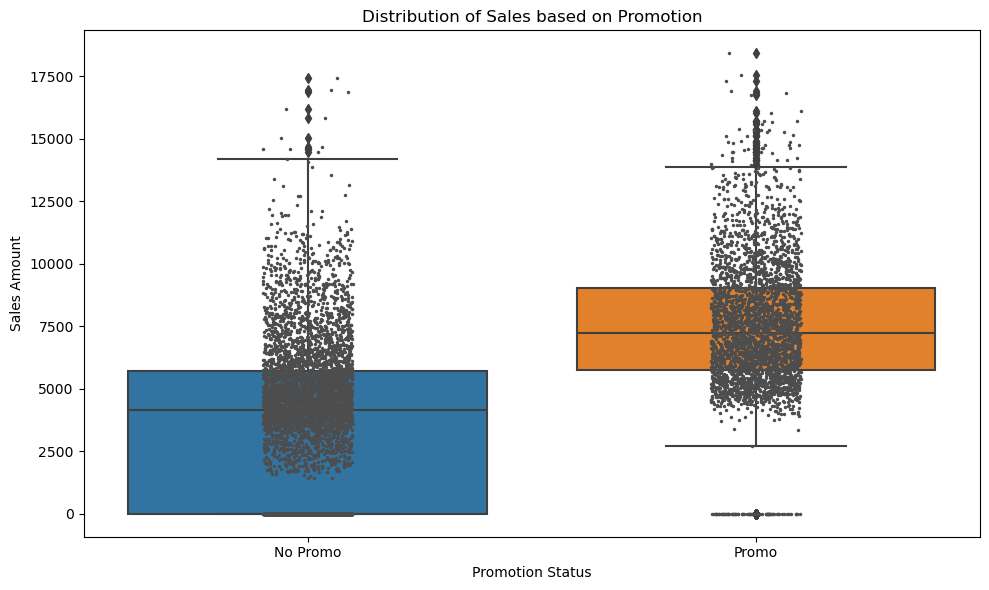

In [11]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x="Promo", y="Sales")
sns.stripplot(data=df, x="Promo", y="Sales", color="0.3", jitter=True, size=2.5)

plt.title("Distribution of Sales based on Promotion")
plt.xlabel("Promotion Status")
plt.ylabel("Sales Amount")
plt.xticks([0, 1], ["No Promo", "Promo"])

plt.tight_layout()
plt.show()

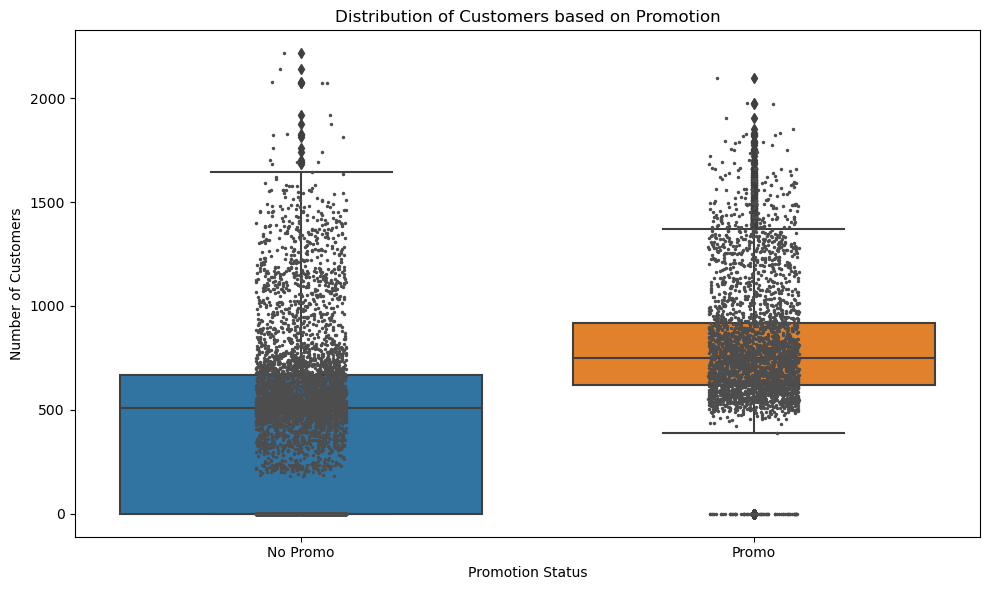

In [12]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x="Promo", y="Customers")
sns.stripplot(data=df, x="Promo", y="Customers", color="0.3", jitter=True, size=2.5)

plt.title("Distribution of Customers based on Promotion")
plt.xlabel("Promotion Status")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ["No Promo", "Promo"])

plt.tight_layout()
plt.show()

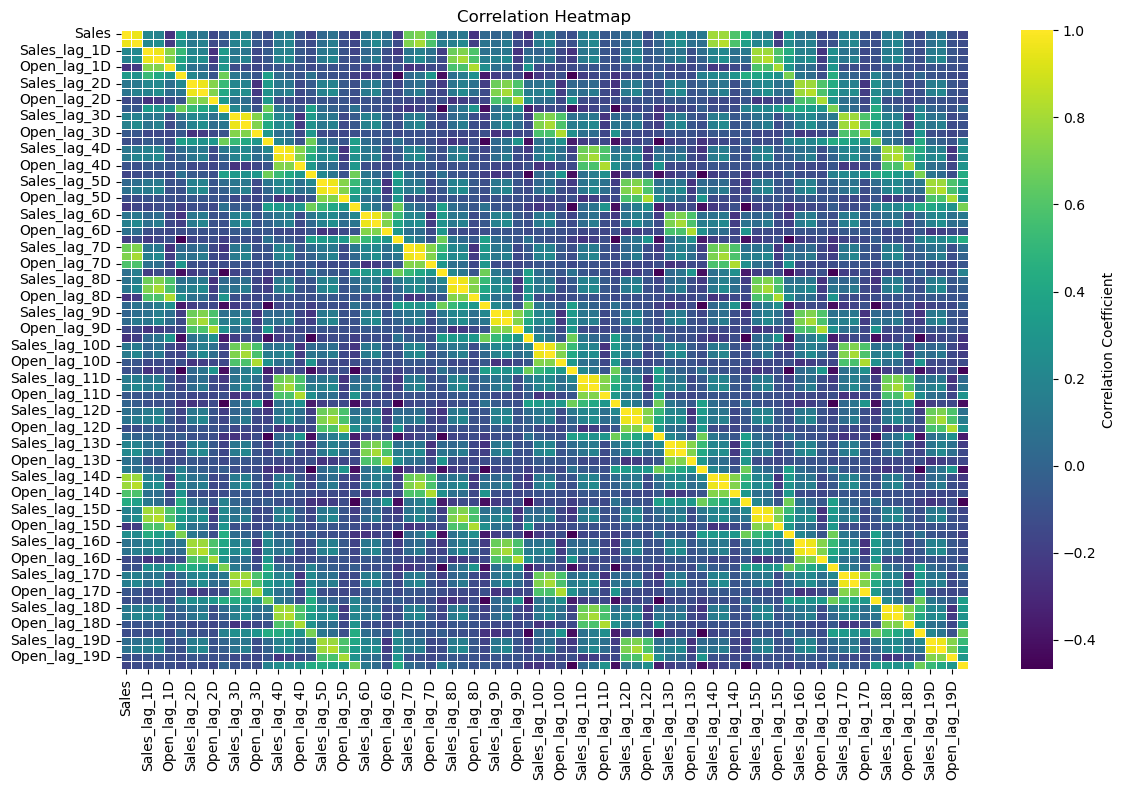

In [13]:
corr = df[["Sales", "Customers"] + [col for col in df.columns if "lag" in col]].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    cmap="viridis",
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Correlation Coefficient"},
)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

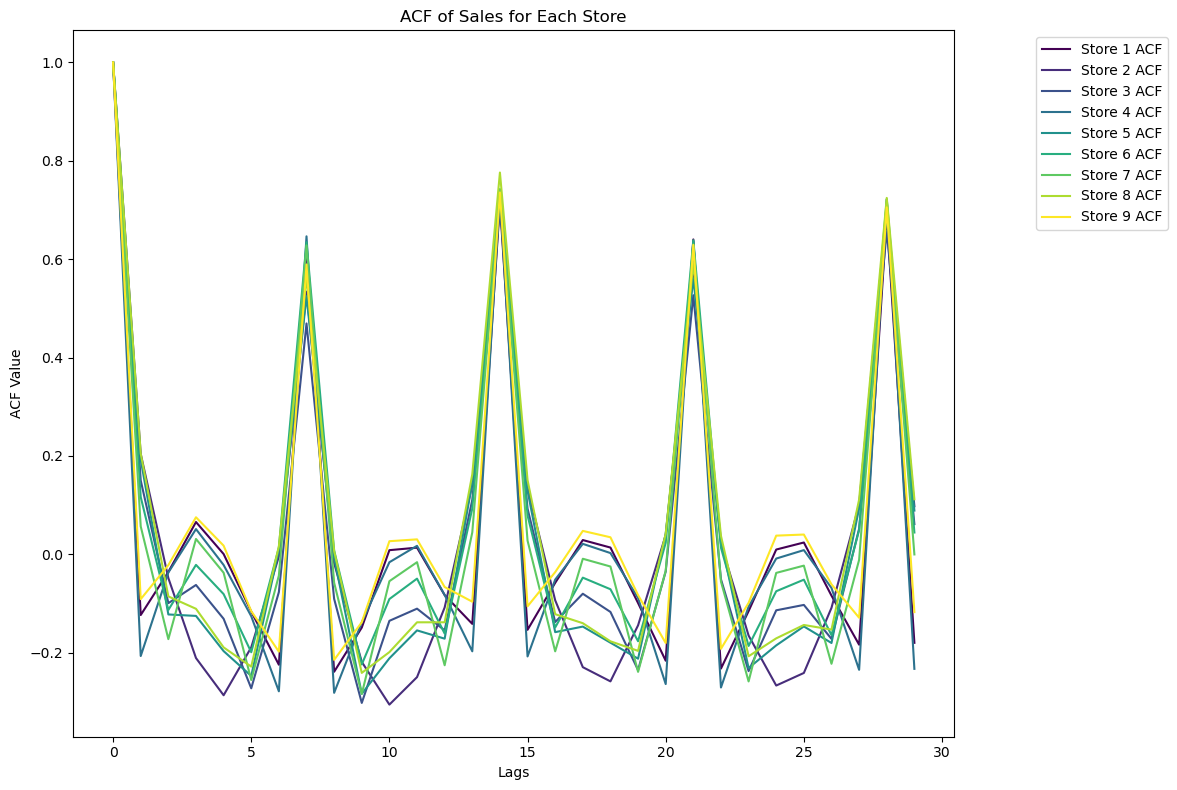

In [14]:
groups = df.groupby("Store")

import numpy as np

colors = plt.cm.viridis(np.linspace(0, 1, len(groups)))

plt.figure(figsize=(12, 8))

for (name, group), color in zip(groups, colors):
    sales_data = group["Sales"]
    acf_values = acf(sales_data)
    plt.plot(acf_values, label=f"Store {name} ACF", color=color)

plt.title("ACF of Sales for Each Store")
plt.xlabel("Lags")
plt.ylabel("ACF Value")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

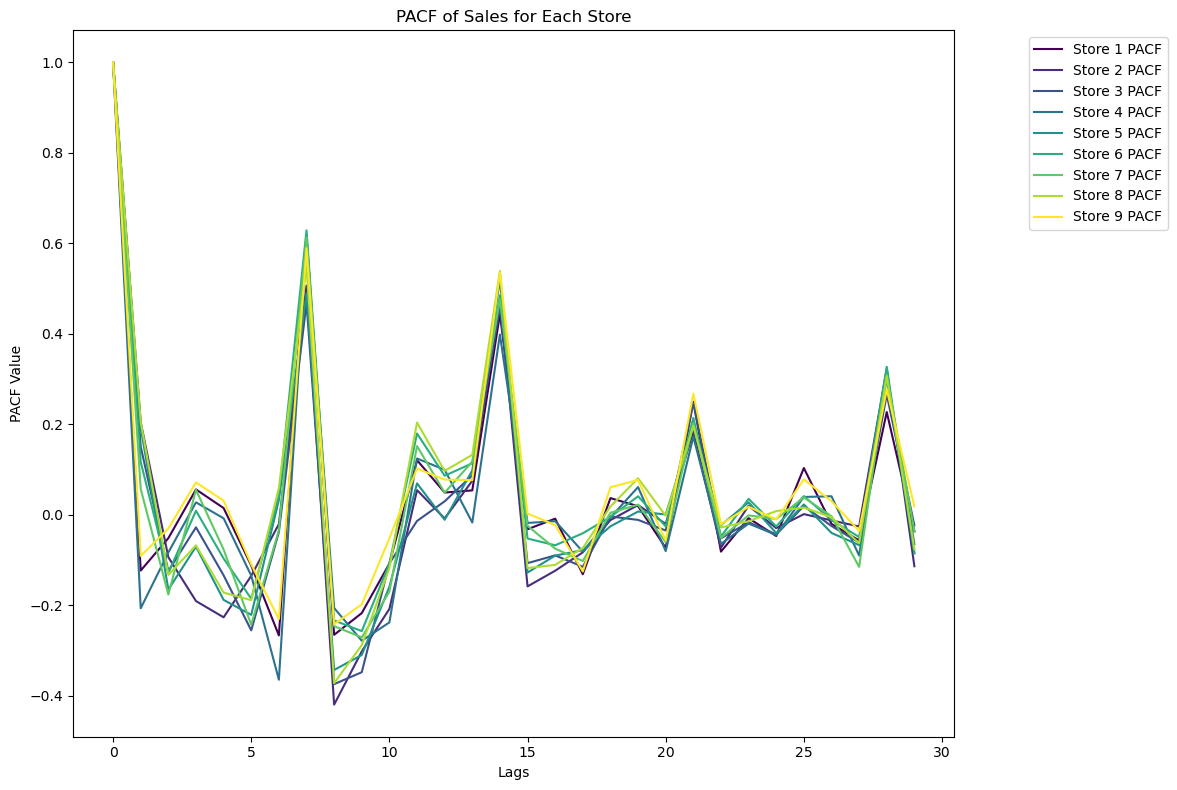

In [15]:
plt.figure(figsize=(12, 8))

for (name, group), color in zip(groups, colors):
    sales_data = group["Sales"]
    pacf_values = pacf(sales_data)
    plt.plot(pacf_values, label=f"Store {name} PACF", color=color)

plt.title("PACF of Sales for Each Store")
plt.xlabel("Lags")
plt.ylabel("PACF Value")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()